In [1]:
import os
os.chdir('../py')

import gc

import pandas as pd
import numpy as np
import feather

from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["patch.force_edgecolor"] = False
plt.rcParams['font.family'] = 'Ricty Diminised'
sns.set(style="whitegrid", font='Ricty Diminised', palette="muted", color_codes=True, rc={'grid.linestyle': '--'})
red = sns.xkcd_rgb["light red"]
green = sns.xkcd_rgb["medium green"]
blue = sns.xkcd_rgb["denim blue"]

import japanize_matplotlib

from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold
from sklearn.preprocessing import LabelEncoder

# my modules
import EDA
import utils

from scipy.stats import ks_2samp

import datetime

import super_aggre

In [3]:
train = pd.read_pickle('../input/pickle/train_df.pkl')
test  = pd.read_pickle('../input/pickle/test_df.pkl')

In [30]:
pd.read_pickle('../input/pickle/remove_features.pkl')

,features_to_remove
0,TransactionID
1,TransactionDT
2,isFraud
3,DT
4,DT_M
5,DT_W
6,DT_D
7,DT_hour
8,DT_day_week
9,DT_day_month


In [4]:
EDA.max_disp(train.head())

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,DT,DT_M,DT_W,DT_D,DT_hour,DT_day_week,DT_day_month,is_december,is_holiday,DT_M_total,DT_W_total,DT_D_total,uid,uid2,uid3,uid4,uid5,card1_fq_enc,card2_fq_enc,card3_fq_enc,card5_fq_enc,uid_fq_enc,uid2_fq_enc,uid3_fq_enc,uid4_fq_enc,uid5_fq_enc,bank_type,card3_DT_D_hour_dist,card3_DT_W_week_day_dist,card3_DT_M_month_day_dist,card3_DT_D_hour_dist_best,card3_DT_W_week_day_dist_best,card3_DT_M_month_day_dist_best,card5_DT_D_hour_dist,card5_DT_W_week_day_dist,card5_DT_M_month_day_dist,card5_DT_D_hour_dist_best,card5_DT_W_week_day_dist_best,card5_DT_M_month_day_dist_best,bank_type_DT_D_hour_dist,bank_type_DT_W_week_day_dist,bank_type_DT_M_month_day_dist,bank_type_DT_D_hour_dist_best,bank_type_DT_W_week_day_dist_best,bank_type_DT_M_month_day_dist_best,bank_type_DT_M,bank_type_DT_W,bank_type_DT_D,uid_D1_mean,uid_D1_std,uid2_D1_mean,uid2_D1_std,uid3_D1_mean,uid3_D1_std,uid4_D1_mean,uid4_D1_std,uid5_D1_mean,uid5_D1_std,bank_type_D1_mean,bank_type_D1_std,uid_D2_mean,uid_D2_std,uid2_D2_mean,uid2_D2_std,uid3_D2_mean,uid3_D2_std,uid4_D2_mean,uid4_D2_std,uid5_D2_mean,uid5_D2_std,bank_type_D2_mean,bank_type_D2_std,uid_D3_mean,uid_D3_std,uid2_D3_mean,uid2_D3_std,uid3_D3_mean,uid3_D3_std,uid4_D3_mean,uid4_D3_std,uid5_D3_mean,uid5_D3_std,bank_type_D3_mean,bank_type_D3_std,uid_D4_mean,uid_D4_std,uid2_D4_mean,uid2_D4_std,uid3_D4_mean,uid3_D4_std,uid4_D4_mean,uid4_D4_std,uid5_D4_mean,uid5_D4_std,bank_type_D4_mean,bank_type_D4_std,uid_D5_mean,uid_D5_std,uid2_D5_mean,uid2_D5_std,uid3_D5_mean,uid3_D5_std,uid4_D5_mean,uid4_D5_std,uid5_D5_mean,uid5_D5_std,bank_type_D5_mean,bank_type_D5_std,uid_D6_mean,uid_D6_std,uid2_D6_mean,uid2_D6_std,uid3_D6_mean,uid3_D6_std,uid4_D6_mean,uid4_D6_std,uid5_D6_mean,uid5_D6_std,bank_type_D6_mean,bank_type_D6_std,uid_D7_mean,uid_D7_std,uid2_D7_mean,uid2_D7_std,uid3_D7_mean,uid3_D7_std,uid4_D7_mean,uid4_D7_std,uid5_D7_mean,uid5_D7_std,bank_type_D7_mean,bank_type_D7_std,uid_D8_mean,uid_D8_std,uid2_D8_mean,uid2_D8_std,uid3_D8_mean,uid3_D8_std,uid4_D8_mean,uid4_D8_std,uid5_D8_mean,uid5_D8_std,bank_type_D8_mean,bank_type_D8_std,uid_D9_mean,uid_D9_std,uid2_D9_mean,uid2_D9_std,uid3_D9_mean,uid3_D9_std,uid

In [11]:
EDA.max_disp(train.tail())

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,DT,DT_M,DT_W,DT_D,DT_hour,DT_day_week,DT_day_month,is_december,is_holiday,DT_M_total,DT_W_total,DT_D_total,uid,uid2,uid3,uid4,uid5,card1_fq_enc,card2_fq_enc,card3_fq_enc,card5_fq_enc,uid_fq_enc,uid2_fq_enc,uid3_fq_enc,uid4_fq_enc,uid5_fq_enc,bank_type,card3_DT_D_hour_dist,card3_DT_W_week_day_dist,card3_DT_M_month_day_dist,card3_DT_D_hour_dist_best,card3_DT_W_week_day_dist_best,card3_DT_M_month_day_dist_best,card5_DT_D_hour_dist,card5_DT_W_week_day_dist,card5_DT_M_month_day_dist,card5_DT_D_hour_dist_best,card5_DT_W_week_day_dist_best,card5_DT_M_month_day_dist_best,bank_type_DT_D_hour_dist,bank_type_DT_W_week_day_dist,bank_type_DT_M_month_day_dist,bank_type_DT_D_hour_dist_best,bank_type_DT_W_week_day_dist_best,bank_type_DT_M_month_day_dist_best,bank_type_DT_M,bank_type_DT_W,bank_type_DT_D,uid_D1_mean,uid_D1_std,uid2_D1_mean,uid2_D1_std,uid3_D1_mean,uid3_D1_std,uid4_D1_mean,uid4_D1_std,uid5_D1_mean,uid5_D1_std,bank_type_D1_mean,bank_type_D1_std,uid_D2_mean,uid_D2_std,uid2_D2_mean,uid2_D2_std,uid3_D2_mean,uid3_D2_std,uid4_D2_mean,uid4_D2_std,uid5_D2_mean,uid5_D2_std,bank_type_D2_mean,bank_type_D2_std,uid_D3_mean,uid_D3_std,uid2_D3_mean,uid2_D3_std,uid3_D3_mean,uid3_D3_std,uid4_D3_mean,uid4_D3_std,uid5_D3_mean,uid5_D3_std,bank_type_D3_mean,bank_type_D3_std,uid_D4_mean,uid_D4_std,uid2_D4_mean,uid2_D4_std,uid3_D4_mean,uid3_D4_std,uid4_D4_mean,uid4_D4_std,uid5_D4_mean,uid5_D4_std,bank_type_D4_mean,bank_type_D4_std,uid_D5_mean,uid_D5_std,uid2_D5_mean,uid2_D5_std,uid3_D5_mean,uid3_D5_std,uid4_D5_mean,uid4_D5_std,uid5_D5_mean,uid5_D5_std,bank_type_D5_mean,bank_type_D5_std,uid_D6_mean,uid_D6_std,uid2_D6_mean,uid2_D6_std,uid3_D6_mean,uid3_D6_std,uid4_D6_mean,uid4_D6_std,uid5_D6_mean,uid5_D6_std,bank_type_D6_mean,bank_type_D6_std,uid_D7_mean,uid_D7_std,uid2_D7_mean,uid2_D7_std,uid3_D7_mean,uid3_D7_std,uid4_D7_mean,uid4_D7_std,uid5_D7_mean,uid5_D7_std,bank_type_D7_mean,bank_type_D7_std,uid_D8_mean,uid_D8_std,uid2_D8_mean,uid2_D8_std,uid3_D8_mean,uid3_D8_std,uid4_D8_mean,uid4_D8_std,uid5_D8_mean,uid5_D8_std,bank_type_D8_mean,bank_type_D8_std,uid_D9_mean,uid_D9_std,uid2_D9_mean,uid2_D9_std,uid3_D9_mean,uid3_D9_std,uid

In [23]:
train.columns[train.dtypes == 'category']

Index(['P_emaildomain', 'R_emaildomain', 'uid', 'uid2', 'uid3', 'uid4', 'uid5',
       'bank_type', 'DeviceType'],
      dtype='object')

In [24]:
test.columns[test.dtypes == 'category']

Index(['P_emaildomain', 'R_emaildomain', 'uid', 'uid2', 'uid3', 'uid4', 'uid5',
       'bank_type', 'DeviceType'],
      dtype='object')

In [12]:
train.shape

(590540, 791)

In [7]:
test.DT_M.unique()

array([19, 20, 21, 22, 23, 24])

In [8]:
train['DT_M_total'].value_counts()

137321    137321
101632    101632
92585      92585
89326      89326
86021      86021
83655      83655
Name: DT_M_total, dtype: int64

In [9]:
train['DT_M'].value_counts()

12    137321
15    101632
13     92585
17     89326
14     86021
16     83655
Name: DT_M, dtype: int64

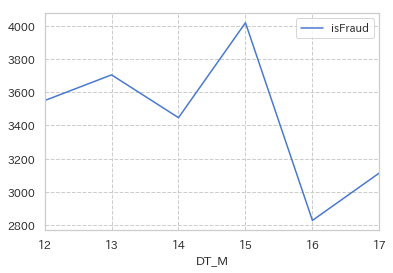

In [6]:
train.groupby('DT_M').agg({'isFraud': 'sum'}).plot(kind='line')

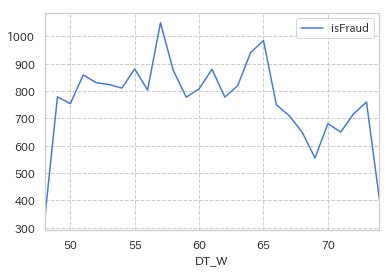

In [13]:
train.groupby('DT_W').agg({'isFraud': 'sum'}).plot(kind='line')

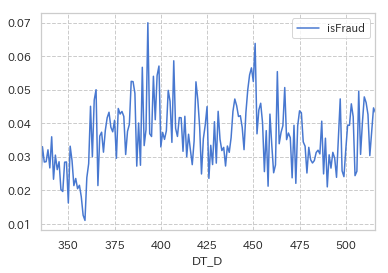

In [31]:
train.groupby('DT_D').agg({'isFraud': 'mean'}).plot(kind='line')

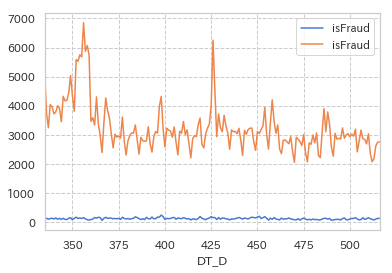

In [27]:
ax = train.groupby('DT_D').agg({'isFraud': 'sum'}).plot(kind='line')
train.groupby('DT_D').agg({'isFraud': 'count'}).plot(kind='line', ax=ax)

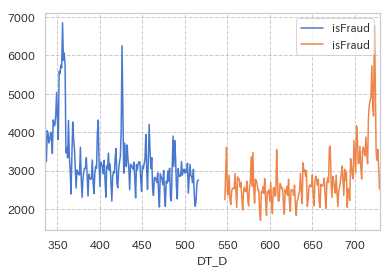

In [29]:
ax = train.groupby('DT_D').agg({'isFraud': 'count'}).plot(kind='line')
test.groupby('DT_D').agg({'isFraud': 'count'}).plot(kind='line', ax=ax)

In [19]:
t0 = train[train['isFraud'] == 0]
t1 = train[train['isFraud'] == 1]

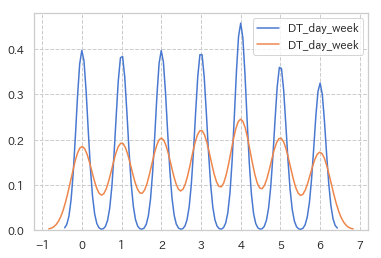

In [21]:
sns.kdeplot(t0['DT_day_week'])
sns.kdeplot(t1['DT_day_week'])

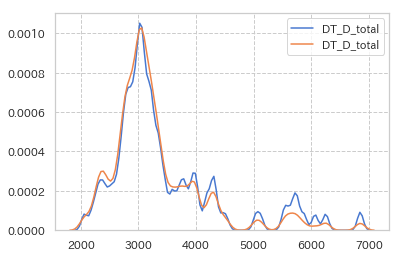

In [32]:
sns.kdeplot(t0['DT_D_total'])
sns.kdeplot(t1['DT_D_total'])

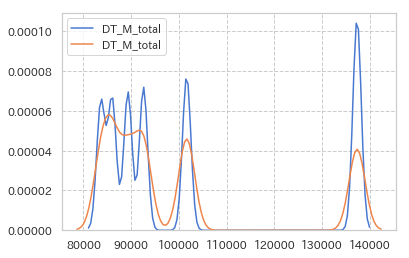

In [33]:
sns.kdeplot(t0['DT_M_total'])
sns.kdeplot(t1['DT_M_total'])

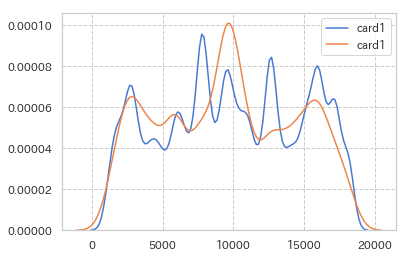

In [22]:
sns.kdeplot(t0['card1'])
sns.kdeplot(t1['card1'])

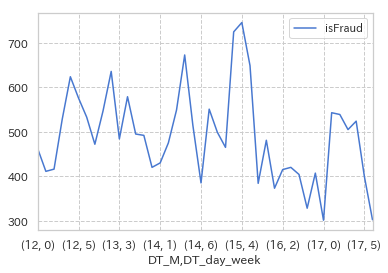

In [18]:
train.groupby(['DT_M', 'DT_day_week']).agg({'isFraud': 'sum'}).plot(kind='line')

In [5]:
train['DT_M'].unique()

array([12, 13, 14, 15, 16, 17])

In [57]:
SEED = 42
NFOLD = 5

from sklearn.model_selection import StratifiedKFold, GroupKFold, KFold, TimeSeriesSplit
def stratified(X_train, y_train):
    folds = StratifiedKFold(n_splits=NFOLD,
                            shuffle=True,
                            random_state=SEED)
    trn_idx_list = []
    val_idx_list = []
    for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train.values, y_train.values)):
        trn_idx_list.append(trn_idx)
        val_idx_list.append(val_idx)

    return trn_idx_list, val_idx_list

def ts_split(X_train, y_train):
    folds = TimeSeriesSplit(n_splits=NFOLD)
    trn_idx_list = []
    val_idx_list = []
    for trn_idx, val_idx in folds.split(X_train, y_train):
        trn_idx_list.append(trn_idx)
        val_idx_list.append(val_idx)

    return trn_idx_list, val_idx_list

def ksplit(X_train, y_train):
    folds = KFold(n_splits=NFOLD, shuffle=False, random_state=SEED)
    trn_idx_list = []
    val_idx_list = []
    for trn_idx, val_idx in folds.split(X_train, y_train):
        trn_idx_list.append(trn_idx)
        val_idx_list.append(val_idx)

    return trn_idx_list, val_idx_list

def my_split(X_train):
    trn_idx = X_train[X_train['DT_M'] < 17].index
    val_idx = X_train[X_train['DT_M'] == 17].index

In [58]:
trl, vrl = ksplit(train.drop(columns='isFraud'), train['isFraud'])

In [40]:
train.loc[trl[0]]['DT_M'].unique()

array([12, 13, 14, 15, 16, 17])

In [41]:
train.loc[vrl[0]]['DT_M'].unique()

array([12, 13, 14, 15, 16, 17])

In [54]:
NFOLD = 5

In [55]:
trl, vrl = ts_split(train.drop(columns='isFraud'), train['isFraud'])

In [59]:
for i in range(NFOLD):
    print(f'\nFOLD {i}')
    print(train.loc[trl[i]]['DT_M'].unique())
    print(train.loc[vrl[i]]['DT_M'].unique())


FOLD 0
[12 13 14 15 16 17]
[12]

FOLD 1
[12 14 15 16 17]
[12 13 14]

FOLD 2
[12 13 14 15 16 17]
[14 15]

FOLD 3
[12 13 14 15 16 17]
[15 16]

FOLD 4
[12 13 14 15 16]
[16 17]


In [64]:
tmp = [[1, 2, 3], [4, 5, 6], [7, 8, 9], ['a', 'b', 'c'], ['d', 'e', 'f']]

In [65]:
tmp[3:]

[['a', 'b', 'c'], ['d', 'e', 'f']]

In [61]:
tmp[0]

[1, 2, 3]